# Title - Nigeria COVID-19 Data Analysis using Python 

### Project Overview
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Many countries across the global community, are facing unprecedented challenges as a result of the COVID-19 pandemic, Nigeria and her people are no exception. According to the Nigeria Centre for Disease Control (NCDC), the virus first appeared in Nigeria on February 29, 2020, when an Italian citizen arrived in Lagos via an airline from Milan, Italy, and proceeded to a factory in Ogun state. With 58 contacts under follow-up, the case was dubbed an index case. On March 3rd, 2020, a total of 15 suspicious cases were discovered in four Nigerian states. This was seen as the start of the disease spreading to other parts of the country, with Lagos, Ogun, the Federal Capital Territory, and Kano being listed as high-risk areas due to their populations and proximity  to  an international airport (except Ogun with no international airport but shares border with Lagos)

### Project Objectives
The aim of this project are:
* Applying data science and data analysis skills to scrap live data from the Nigeria Centre for Disease Control (NCDC) Coronavirus Covid-19.
* Exploring the data, perform analysis, create visualizations, and generate insights using python tools like numpy, pandas, matplolib, seaborn e.t.c.

### Importing Labraries

In [1]:
import requests
import numpy as np
import urllib
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup as bs
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

### Data Collection
https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covidnig.csv

NCDC Website scrap

This ncdc portal below is not working to attract Nigeria covid-19 dataset 
* Website - https://ncdc.gov.ng

### Global Data
John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below.

* Global Daily Confirmed Cases - Click https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
* Global Daily Recovered Cases - Click https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
* Global Daily Death Cases - Click Here https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

In [2]:
# Loading the extracted data from github
#Global Daily Confirmed Cases
jhopkins_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col=False)

In [3]:
#Global Daily Recovered Cases
jhopkins_recovered = pd.read_csv('time_series_covid19_recovered_global.csv',index_col=False)

In [4]:
#Global Daily Death Cases
jhopkins_deaths = pd.read_csv('time_series_covid19_deaths_global.csv', index_col=False)    

In [5]:
jhopkins_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207493,207511,207550,207559,207616,207627,207654,207715,207748,207766
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333776,333776,333806,333806,333811,333812,333812,333818,333850,333887
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271208,271217,271223,271228,271229,271229,271230,271236,271244,271250
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47751,47751,47751,47751,47751,47751,47751,47751,47781,47781
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105095,105095,105095,105095,105095,105095,105095,105095,105095


In [6]:
jhopkins_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Cleaning & Preparation

In [7]:
jhopkins_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23,1/3/23,1/4/23,1/5/23,1/6/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7846,7847,7847,7849,7849,7849,7850,7850,7850,7850
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930


In [8]:
#Extract the shape of jhopkins
jhopkins_confirmed.shape

(289, 1085)

There are only 289 rows and 1085 columns for hopkins global daily confirmed cases

In [9]:
#Extract the shape of jhopkins
jhopkins_deaths.shape

(289, 1085)

There are only 289 rows and 1085 columns for hopkins global daily death cases

In [10]:
jhopkins_recovered.shape

(274, 1085)

There are only 274 rows and 1085 columns for hopkins global daily death cases

#### Daily Confirmed Cases

In [11]:
jhopkins_confirmed.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
jhopkins_confirmed.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_confirmed = jhopkins_confirmed[jhopkins_confirmed["Country"] == "Nigeria"]

columns = nigeria_confirmed.iloc[:, 5:]

df_nig_confirmed = nigeria_confirmed.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nig_confirmed["Date"] = df_nig_confirmed["Date"].apply(pd.to_datetime, errors='coerce')
df_nig_confirmed.tail()

,Date,Cases
1072,2023-01-02,266450
1073,2023-01-03,266450
1074,2023-01-04,266450
1075,2023-01-05,266450
1076,2023-01-06,266450


In [12]:
jhopkins_recovered.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
jhopkins_recovered.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_recovered = jhopkins_recovered[jhopkins_recovered["Country"] == "Nigeria"]

columns = nigeria_recovered.iloc[:, 5:]

df_nig_recovered = nigeria_recovered.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nig_recovered["Date"] = df_nig_recovered["Date"].apply(pd.to_datetime, errors='coerce')
df_nig_recovered.head()

,Date,Cases
0,2020-01-26,0
1,2020-01-27,0
2,2020-01-28,0
3,2020-01-29,0
4,2020-01-30,0


In [13]:
jhopkins_deaths.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
jhopkins_deaths.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_deaths = jhopkins_deaths[jhopkins_deaths["Country"] == "Nigeria"]
columns = nigeria_deaths.iloc[:, 5:]
df_nig_deaths = nigeria_deaths.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nig_deaths["Date"] = df_nig_deaths["Date"].apply(pd.to_datetime, errors='coerce')
df_nig_deaths.tail()

,Date,Cases
1072,2023-01-02,3155
1073,2023-01-03,3155
1074,2023-01-04,3155
1075,2023-01-05,3155
1076,2023-01-06,3155


Text(0.5, 1.0, 'Nigeria Daily Infection Rate')

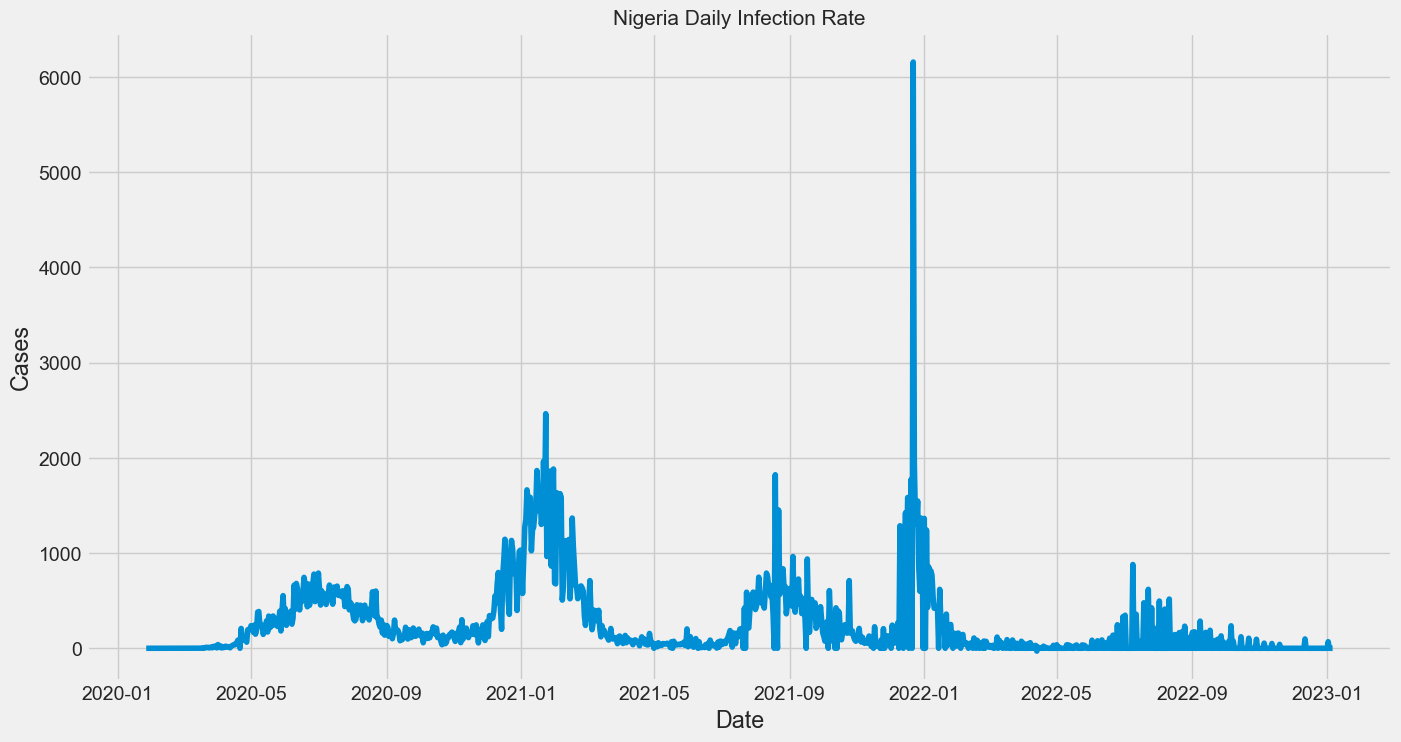

In [14]:
nig_daily_infection = df_nig_confirmed.Cases.diff()
plt.figure(figsize= (15, 8))
sns.lineplot(df_nig_confirmed.Date, nig_daily_infection).set_title('Nigeria Daily Infection Rate', fontdict={'fontsize': 15})

### Highest Infection Rate and date

In [15]:
df_nig_confirmed = df_nig_confirmed["Cases"].diff()
highest_infection = df_nig_confirmed.max()
print('The Maximum Infection Rate Per Day is {}'.format(highest_infection))

The Maximum Infection Rate Per Day is 6158.0


### External Data

In [16]:
gdp_df = pd.read_csv('RealGDP.csv')
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [17]:
covid_external_df = pd.read_csv('covid_external.csv')
covid_external_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [18]:
budget_df = pd.read_csv('Budget data.csv')
budget_df.tail()

,states,Initial_budget (Bn),Revised_budget (Bn)
32,Sokoto,202.40,153.0
33,Taraba,215.00,150.5
34,Yobe,108.00,86.0
35,Zamfara,188.50,127.3
36,FCT,278.78,199.0


In [19]:
budget_df.rename(columns={'states': 'States'}, inplace=True)
budget_df.head()

,States,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [20]:
covid_external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [21]:
covid_external_df.isnull().sum()

states                     0
region                     0
Population                 0
Overall CCVI Index         0
Age                        0
Epidemiological            0
Fragility                  0
Health System              0
Population Density         0
Socio-Economic             0
 Transport Availability    0
Acute IHR                  0
dtype: int64

In [22]:
covid_external_df.describe()

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


In [23]:
covid_external_df.groupby('region')[covid_external_df.columns].agg('mean').sort_values(by='Population')

,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
region,,,,,,,,,,
North Central,4.792000e+06,0.328571,0.314286,0.485714,0.542857,0.414286,0.342857,0.528571,0.514286,0.874286
South South,4.806833e+06,0.416667,0.700000,0.616667,0.400000,0.466667,0.600000,0.316667,0.450000,1.025000
North East,4.899167e+06,0.883333,0.416667,0.400000,0.916667,0.733333,0.150000,0.766667,0.816667,0.873333
South East,5.430400e+06,0.420000,0.900000,0.720000,0.260000,0.400000,0.860000,0.300000,0.060000,1.098000
South West,7.106167e+06,0.150000,0.616667,0.616667,0.333333,0.333333,0.733333,0.133333,0.300000,1.031667
North West,7.807857e+06,0.785714,0.214286,0.242857,0.514286,0.642857,0.414286,0.871429,0.757143,0.872857


### Webscrapping using Beautiful Soup

Request for the url address

In [24]:
url_site = 'https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covidnig.csv'
resp = urllib.request.urlopen(url_site)

#page = requests.get(url).text
#soup = BeautifulSoup(page, 'lxml')
#soup
#soup = bs(resp)
#print(soup)

In [25]:
data1 = resp.read()
data1

b'\n\n\n\n\n\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark" data-a11y-animated-images="system">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  <link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/light-fe3f886b577a.css" /><link crossorigin="anonymous" media="all" rel="stylesheet" href="https://github.githubassets.com/assets/dark-a1dbeda2886c.css" /><link data-color-theme="dark_dimmed" crossorigin="anonymous" media="all" rel="stylesheet" data-hr

In [26]:
#names = soup.body.findAll('th')
#print(names)

### Parse with the beautiful soup library

In [27]:
#names = soup.body.findAll('table')
#print(names)
names = bs(data1, 'html.parser')
tbl= names.find_all('table')
tbl

[<table class="js-csv-data csv-data js-file-line-container">
 <thead>
 <tr class="js-file-line" id="LC1">
 <td class="blob-num js-line-number" data-line-number="1" id="L1"></td>
 <th>States Affected</th>
 <th>No. of Cases (Lab Confirmed)</th>
 <th>No. of Cases (on admission)</th>
 <th>No. Discharged</th>
 <th>No. of Deaths</th>
 </tr>
 </thead>
 <tbody>
 <tr class="js-file-line" id="LC2">
 <td class="blob-num js-line-number" data-line-number="2" id="L2"></td>
 <td>Lagos</td>
 <td>26,708</td>
 <td>2,435</td>
 <td>24,037</td>
 <td>236</td>
 </tr>
 <tr class="js-file-line" id="LC3">
 <td class="blob-num js-line-number" data-line-number="3" id="L3"></td>
 <td>FCT</td>
 <td>9,627</td>
 <td>2,840</td>
 <td>6,694</td>
 <td>93</td>
 </tr>
 <tr class="js-file-line" id="LC4">
 <td class="blob-num js-line-number" data-line-number="4" id="L4"></td>
 <td>Kaduna</td>
 <td>4,504</td>
 <td>579</td>
 <td>3,877</td>
 <td>48</td>
 </tr>
 <tr class="js-file-line" id="LC5">
 <td class="blob-num js-line-num

In [28]:
#Extract the content of the element 
tbl[0]

<table class="js-csv-data csv-data js-file-line-container">
<thead>
<tr class="js-file-line" id="LC1">
<td class="blob-num js-line-number" data-line-number="1" id="L1"></td>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
</thead>
<tbody>
<tr class="js-file-line" id="LC2">
<td class="blob-num js-line-number" data-line-number="2" id="L2"></td>
<td>Lagos</td>
<td>26,708</td>
<td>2,435</td>
<td>24,037</td>
<td>236</td>
</tr>
<tr class="js-file-line" id="LC3">
<td class="blob-num js-line-number" data-line-number="3" id="L3"></td>
<td>FCT</td>
<td>9,627</td>
<td>2,840</td>
<td>6,694</td>
<td>93</td>
</tr>
<tr class="js-file-line" id="LC4">
<td class="blob-num js-line-number" data-line-number="4" id="L4"></td>
<td>Kaduna</td>
<td>4,504</td>
<td>579</td>
<td>3,877</td>
<td>48</td>
</tr>
<tr class="js-file-line" id="LC5">
<td class="blob-num js-line-number" data-line-number="5" id="L5"></td

### Extract all the rows

In [29]:
#rows = soup.findAll('tr')
#rows[2]
rows = names.findAll('tr')
rows[1]

<tr class="js-file-line" id="LC2">
<td class="blob-num js-line-number" data-line-number="2" id="L2"></td>
<td>Lagos</td>
<td>26,708</td>
<td>2,435</td>
<td>24,037</td>
<td>236</td>
</tr>

In [30]:
columns = []
headers = rows[0].findAll('th')
headers

[<th>States Affected</th>,
 <th>No. of Cases (Lab Confirmed)</th>,
 <th>No. of Cases (on admission)</th>,
 <th>No. Discharged</th>,
 <th>No. of Deaths</th>]

In [31]:
#data = []
#for row in rows[1:]:
#   cells = row.findAll('td')
 #   data.append(cells)
#info

### Extract the data in tabular form

In [32]:
#df = pd.DataFrame(info)
#df.head()

In [33]:
#Extract Header Only and its content
columns = []
for cell in headers:
    header = cell.text.strip().replace('\n', '')
    columns.append(header)
    print(header)

States Affected
No. of Cases (Lab Confirmed)
No. of Cases (on admission)
No. Discharged
No. of Deaths


In [34]:
data = []
for row in rows[1:]:
    cells = row.findAll('td')
    dt = ()
    for cell in cells[1:]:
        d = cell.text.strip().replace('\n', ' ')
        dt = dt + (d,)
    data.append(dt)
    
data

[('Lagos', '26,708', '2,435', '24,037', '236'),
 ('FCT', '9,627', '2,840', '6,694', '93'),
 ('Kaduna', '4,504', '579', '3,877', '48'),
 ('Plateau', '4,262', '280', '3,948', '34'),
 ('Oyo', '3,788', '368', '3,374', '46'),
 ('Rivers', '3,279', '232', '2,987', '60'),
 ('Edo', '2,768', '52', '2,603', '113'),
 ('Ogun', '2,382', '174', '2,175', '33'),
 ('Kano', '2,032', '198', '1,778', '56'),
 ('Delta', '1,843', '57', '1,737', '49'),
 ('Ondo', '1,793', '62', '1,690', '41'),
 ('Katsina', '1,405', '214', '1,167', '24'),
 ('Enugu', '1,376', '34', '1,321', '21'),
 ('Kwara', '1,296', '171', '1,094', '31'),
 ('Gombe', '1,164', '183', '950', '31'),
 ('Ebonyi', '1,091', '24', '1,037', '30'),
 ('Abia', '980', '25', '945', '10'),
 ('Osun', '979', '20', '937', '22'),
 ('Bauchi', '897', '108', '775', '14'),
 ('Borno', '778', '37', '705', '36'),
 ('Imo', '734', '61', '661', '12'),
 ('Nasarawa', '600', '262', '325', '13'),
 ('Benue', '515', '44', '460', '11'),
 ('Bayelsa', '497', '55', '421', '21'),
 ('Ek

In [147]:
df = pd.DataFrame(data, columns=columns)
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [148]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [149]:
df.tail(6)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
31,Taraba,203,19,177,7
32,Yobe,164,33,123,8
33,Kebbi,143,5,130,8
34,Cross River,93,1,81,11
35,Zamfara,79,1,73,5
36,Kogi,5,0,3,2


### Extract the tables

### Webscraping using pandas pd.read_csv

In [40]:
df = pd.read_csv('covidnig.csv')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [41]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [43]:
# Remove the comma in No. of Cases (Lab Confirmed) column
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,"2,435","24,037",236
1,FCT,9627,"2,840","6,694",93
2,Kaduna,4504,579,"3,877",48
3,Plateau,4262,280,"3,948",34
4,Oyo,3788,368,"3,374",46
5,Rivers,3279,232,"2,987",60
6,Edo,2768,52,"2,603",113
7,Ogun,2382,174,"2,175",33
8,Kano,2032,198,"1,778",56
9,Delta,1843,57,"1,737",49


In [44]:
# Remove the comma in No. of Cases (on admission) column
df['No. of Cases (on admission)']=df['No. of Cases (on admission)'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,"24,037",236
1,FCT,9627,2840,"6,694",93
2,Kaduna,4504,579,"3,877",48
3,Plateau,4262,280,"3,948",34
4,Oyo,3788,368,"3,374",46
5,Rivers,3279,232,"2,987",60
6,Edo,2768,52,"2,603",113
7,Ogun,2382,174,"2,175",33
8,Kano,2032,198,"1,778",56
9,Delta,1843,57,"1,737",49


In [45]:
# Remove the comma in No. of Cases (on admission) column
df['No. Discharged']=df['No. Discharged'].str.replace(',','')
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


Convert all the column objects to integer

In [47]:
#Convert No. of Cases (Lab Confirmed) object to integer
df['No. of Cases (Lab Confirmed)'] = df['No. of Cases (Lab Confirmed)'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 1.4+ KB


In [48]:
#Convert No. of Cases (on admission) object to integer
df['No. of Cases (on admission)'] = df['No. of Cases (on admission)'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.3+ KB


In [49]:
#Convert No. Discharged object to integer
df['No. Discharged'] = df['No. Discharged'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


In [50]:
df.head(7)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113


In [51]:
#Check the number of rows and columns present in the data using the shape attribute.
df.shape

(37, 5)

In [52]:
df.shape[0]

37

In [53]:
df.shape[1]

5

There are 37 rows and 5 columns

In [54]:
#Rename columns
df.rename(columns={'States Affected': 'States', 
                    'No. of Cases (Lab Confirmed)': 'Confirmed cases',
                    'No. of Cases (on admission)': 'Admitted cases',
                    'No. Discharged':'Recovered cases',
                    'No. of Deaths':'Death'}, inplace= True)
df.head()


,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [55]:
df.tail(3)

,States,Confirmed cases,Admitted cases,Recovered cases,Death
34,Cross River,93,1,81,11
35,Zamfara,79,1,73,5
36,Kogi,5,0,3,2


In [56]:
#Use describe function to generate the statistical summary of the dataframe
df.describe()

,Confirmed cases,Admitted cases,Recovered cases,Death
count,37.000000,37.000000,37.000000,37.000000
mean,2119.837838,240.810811,1846.027027,33.000000
std,4537.417740,595.255773,4009.464785,41.797794
min,5.000000,0.000000,3.000000,2.000000
25%,381.000000,25.000000,300.000000,11.000000
50%,897.000000,57.000000,775.000000,21.000000
75%,1843.000000,183.000000,1737.000000,36.000000
max,26708.000000,2840.000000,24037.000000,236.000000


Comment:
* The least death recorded is 2 while the highest death recorded is 236 and the average is 33
* The highest Confirmed cases is 26708 and the least is 5 while the average corfirmed case is approximately 2120
* The highest admitted cases recorded is 2840 and the average recorded is 241 approximately 
* Admitted cases took place everyday
* Higheset number of patients recover is 24037
* Average number of covid19 deaths across all states in Nigeria is 33
* Highest number of deaths recorded in a state is 236 and minimum is 4.
* 75% of death cases is 36 deaths while 25% of death cases result 11.

In [57]:
# Extract the average of discharged
df['Recovered cases'].mean()

1846.027027027027

In [58]:
# Extract the highest number of discharged
df['Recovered cases'].max()

24037

In [59]:
# Extract the least number of discharged
df['Recovered cases'].min()

3

In [60]:
# Extract the middle number of discharged
df['Recovered cases'].median()

775.0

In [61]:
#Extract the average Admitted cases
df['Admitted cases'].mean()

240.8108108108108

In [62]:
#Extract the median of No. of Cases (on admission)
df['Admitted cases'].median()

57.0

In [63]:
#Maximum std
df.std().max()

4537.417740383924

In [64]:
# Use of correct method to check for Missing values
df.isna().sum()

States             0
Confirmed cases    0
Admitted cases     0
Recovered cases    0
Death              0
dtype: int64

Comment:
* From the above result, there is no missing value

In [65]:
df.dtypes

States             object
Confirmed cases     int32
Admitted cases      int32
Recovered cases     int32
Death               int64
dtype: object

In [66]:
#Extract only the standard deviation
df.std()

Confirmed cases    4537.417740
Admitted cases      595.255773
Recovered cases    4009.464785
Death                41.797794
dtype: float64

In [67]:
#Extract the highest standard deviation
df.std().max()

4537.417740383924

Confirmed cases has the highest standard deviation

In [68]:
#Confirmed cases has the least standard deviation
df.std().min()

41.79779366851264

Death cases has the least standard deviation

In [69]:
#The top 5 highest number of death
df.nlargest(5, 'Death')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56


In [70]:
#The top 5 smallest number of death
df.nsmallest(5, 'Death')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
24,Ekiti,405,24,375,6
31,Taraba,203,19,177,7
32,Yobe,164,33,123,8


In [71]:
#The top 5 highest number of gross income
df.nlargest(5, 'Confirmed cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [72]:
#The top 7 smallest number of Admitted cases
df.nsmallest(7, 'Admitted cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
36,Kogi,5,0,3,2
34,Cross River,93,1,81,11
35,Zamfara,79,1,73,5
33,Kebbi,143,5,130,8
29,Anambra,299,6,274,19
31,Taraba,203,19,177,7
17,Osun,979,20,937,22


In [73]:
#The top 5 highest number of Admitted cases
df.nlargest(7, 'Admitted cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death
1,FCT,9627,2840,6694,93
0,Lagos,26708,2435,24037,236
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
3,Plateau,4262,280,3948,34
21,Nasarawa,600,262,325,13
5,Rivers,3279,232,2987,60


In [74]:
#Extract how many patients died where death record cases is less than 50
death = df['Death'] > 100
print('There are {} patients died'.format(death.sum()))

There are 2 patients died


In [75]:
df[df['Death'] < 50]

,States,Confirmed cases,Admitted cases,Recovered cases,Death
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
7,Ogun,2382,174,2175,33
9,Delta,1843,57,1737,49
10,Ondo,1793,62,1690,41
11,Katsina,1405,214,1167,24
12,Enugu,1376,34,1321,21
13,Kwara,1296,171,1094,31
14,Gombe,1164,183,950,31


In [76]:
#Extract how many patients died where death record cases is less than 50
dis = df['Recovered cases'] > 2000
print('There are {} patients discharged'.format(dis.sum()))

There are 8 patients discharged


In [77]:
#Extract the information of patients whose number of discharged is above 2000 
df[df['Recovered cases'] > 2000]

,States,Confirmed cases,Admitted cases,Recovered cases,Death
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33


In [78]:
#Extract number of Discharged across different states
df[['States', 'Recovered cases']].head(8)

,States,Recovered cases
0,Lagos,24037
1,FCT,6694
2,Kaduna,3877
3,Plateau,3948
4,Oyo,3374
5,Rivers,2987
6,Edo,2603
7,Ogun,2175


In [79]:
#Accessing death records for first 5 states
df.loc[0:4,['Death', 'States']]

,Death,States
0,236,Lagos
1,93,FCT
2,48,Kaduna
3,34,Plateau
4,46,Oyo


### Unique Values in Columns

In [80]:
#Generate the names of the columns using the columns attribute
df.columns

Index(['States', 'Confirmed cases', 'Admitted cases', 'Recovered cases',
       'Death'],
      dtype='object')

In [81]:
for i in df.columns:
    print(i)

States
Confirmed cases
Admitted cases
Recovered cases
Death


In [82]:
#Generated the count figure of the States values using the tolist method.
df['States'].unique().tolist()

['Lagos',
 'FCT',
 'Kaduna',
 'Plateau',
 'Oyo',
 'Rivers',
 'Edo',
 'Ogun',
 'Kano',
 'Delta',
 'Ondo',
 'Katsina',
 'Enugu',
 'Kwara',
 'Gombe',
 'Ebonyi',
 'Abia',
 'Osun',
 'Bauchi',
 'Borno',
 'Imo',
 'Nasarawa',
 'Benue',
 'Bayelsa',
 'Ekiti',
 'Akwa Ibom',
 'Jigawa',
 'Niger',
 'Adamawa',
 'Anambra',
 'Sokoto',
 'Taraba',
 'Yobe',
 'Kebbi',
 'Cross River',
 'Zamfara ',
 'Kogi']

In [83]:
print("There are {} affected states". format(len(df['States'].unique().tolist())))

There are 37 affected states


In [84]:
#Print out the death recorde for each state
print(df['Death'].unique())

[236  93  48  34  46  60 113  33  56  49  41  24  21  31  30  10  22  14
  36  12  13  11   6   9  19  17   7   8   5   2]


### Aggregation with GroupBy

In [85]:
df.groupby('States').agg(['sum', 'mean']).head()

Confirmed cases        Admitted cases        Recovered cases         \
                      sum   mean            sum   mean             sum   mean   
States                                                                          
Abia                  980  980.0             25   25.0             945  945.0   
Adamawa               355  355.0             96   96.0             238  238.0   
Akwa Ibom             395  395.0             44   44.0             342  342.0   
Anambra               299  299.0              6    6.0             274  274.0   
Bauchi                897  897.0            108  108.0             775  775.0   

          Death        
            sum  mean  
States                 
Abia         10  10.0  
Adamawa      21  21.0  
Akwa Ibom     9   9.0  
Anambra      19  19.0  
Bauchi       14  14.0

In [86]:
df_covid_external_df = pd.merge(df, covid_external_df, left_on='States', right_on='states',how='left').drop('states',axis=1)
df_covid_external_df

,States,Confirmed cases,Admitted cases,Recovered cases,Death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627,2840,6694,93,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504,579,3877,48,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262,280,3948,34,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788,368,3374,46,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279,232,2987,60,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768,52,2603,113,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382,174,2175,33,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032,198,1778,56,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843,57,1737,49,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


In [87]:
#How many rows and columns
df_covid_external_df.shape

(37, 16)

There are 37 rows and 16 columns only

In [88]:
df_covid_external_df.describe()

,Confirmed cases,Admitted cases,Recovered cases,Death,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,37.000000,37.000000,37.000000,37.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2119.837838,240.810811,1846.027027,33.000000,6.005735e+06,0.502941,0.520588,0.505882,0.476471,0.520588,0.523529,0.488235,0.488235,0.958824
std,4537.417740,595.255773,4009.464785,41.797794,2.663294e+06,0.298973,0.307265,0.302456,0.299554,0.288968,0.299554,0.301275,0.306263,0.102181
min,5.000000,0.000000,3.000000,2.000000,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000
25%,381.000000,25.000000,300.000000,11.000000,4.680250e+06,0.300000,0.300000,0.300000,0.225000,0.300000,0.300000,0.225000,0.225000,0.870000
50%,897.000000,57.000000,775.000000,21.000000,5.432000e+06,0.500000,0.550000,0.500000,0.450000,0.500000,0.550000,0.500000,0.450000,0.930000
75%,1843.000000,183.000000,1737.000000,36.000000,6.420250e+06,0.775000,0.800000,0.775000,0.700000,0.775000,0.800000,0.775000,0.775000,1.055000
max,26708.000000,2840.000000,24037.000000,236.000000,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000


In [89]:
df_covid_external_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   States                   37 non-null     object 
 1   Confirmed cases          37 non-null     int32  
 2   Admitted cases           37 non-null     int32  
 3   Recovered cases          37 non-null     int32  
 4   Death                    37 non-null     int64  
 5   region                   34 non-null     object 
 6   Population               34 non-null     float64
 7   Overall CCVI Index       34 non-null     float64
 8   Age                      34 non-null     float64
 9   Epidemiological          34 non-null     float64
 10  Fragility                34 non-null     float64
 11  Health System            34 non-null     float64
 12  Population Density       34 non-null     float64
 13  Socio-Economic           34 non-null     float64
 14   Transport Availability  34 

In [90]:
#Extract the missing data
df_covid_external_df.isnull().sum()

States                     0
Confirmed cases            0
Admitted cases             0
Recovered cases            0
Death                      0
region                     3
Population                 3
Overall CCVI Index         3
Age                        3
Epidemiological            3
Fragility                  3
Health System              3
Population Density         3
Socio-Economic             3
 Transport Availability    3
Acute IHR                  3
dtype: int64

In [91]:
df_covid_external_df.nlargest(10,'Confirmed cases')

,States,Confirmed cases,Admitted cases,Recovered cases,Death,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,26708,2435,24037,236,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,9627,2840,6694,93,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Kaduna,4504,579,3877,48,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
3,Plateau,4262,280,3948,34,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
4,Oyo,3788,368,3374,46,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,3279,232,2987,60,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,2768,52,2603,113,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,2382,174,2175,33,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,2032,198,1778,56,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Delta,1843,57,1737,49,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08


In [92]:
budget_df.head()

,States,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [93]:
budget_df.describe()

,Initial_budget (Bn),Revised_budget (Bn)
count,37.00000,37.000000
mean,276.22027,171.092432
std,299.37630,142.974439
min,108.00000,62.960000
25%,152.92000,108.300000
50%,183.30000,128.800000
75%,242.18000,174.000000
max,1680.00000,920.500000


In [94]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   States               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [95]:
budget_df.isnull().sum()

States                 0
Initial_budget (Bn)    0
Revised_budget (Bn)    0
dtype: int64

In [96]:
result = (budget_df['Initial_budget (Bn)']-budget_df['Revised_budget (Bn)'])/(budget_df['Initial_budget (Bn)'])
budget_df['Percentage Change In Budget(%)'] = result * 100
budget_df

,States,Initial_budget (Bn),Revised_budget (Bn),Percentage Change In Budget(%)
0,Abia,136.60,102.70,24.816984
1,Adamawa,183.30,139.31,23.998909
2,Akwa-Ibom,597.73,366.00,38.768340
3,Anambra,137.10,112.80,17.724289
4,Bauchi,167.20,128.00,23.444976
5,Bayelsa,242.18,183.15,24.374432
6,Benue,189.00,119.00,37.037037
7,Borno,146.80,108.80,25.885559
8,Cross River,1100.00,147.10,86.627273
9,Delta,395.50,282.30,28.621997


In [97]:
gdp_df.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [98]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [99]:
gdp_df['Year']=gdp_df['Year'].astype('object')
gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [100]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      object 
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), object(1)
memory usage: 408.0+ bytes


In [101]:
gdp_df.describe()

,Q1,Q2,Q3,Q4
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.607174e+07,1.635760e+07,1.788093e+07,1.600959e+07
std,4.225676e+05,3.423407e+05,3.442170e+05,7.075830e+06
min,1.543868e+07,1.589000e+07,1.747913e+07,0.000000e+00
25%,1.587084e+07,1.615158e+07,1.765783e+07,1.818195e+07
50%,1.605060e+07,1.633472e+07,1.782000e+07,1.853375e+07
75%,1.626560e+07,1.652192e+07,1.802879e+07,1.881975e+07
max,1.674000e+07,1.693143e+07,1.849411e+07,1.953000e+07


In [102]:
gdp_df.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [103]:
gdp_df.isnull().sum()

Year    0
Q1      0
Q2      0
Q3      0
Q4      0
dtype: int64

In [104]:
quart=gdp_df.columns[1:]
quart
gdp_df = pd.melt(gdp_df, id_vars=['Year'],value_vars=quart,var_name='Q1_Q4',value_name='GDP')
gdp_df.head()

,Year,Q1_Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


In [105]:
quarter1 = gdp_df[:7]
quarter1

,Year,Q1_Q4,GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00


In [106]:
quarter2 = gdp_df[7:14]
quarter2

,Year,Q1_Q4,GDP
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41
10,2017,Q2,16334719.27
11,2018,Q2,16580508.07
12,2019,Q2,16931434.89
13,2020,Q2,15890000.00


In [107]:
quarter3 = gdp_df[14:21]
quarter3

,Year,Q1_Q4,GDP
14,2014,Q3,17479127.58
15,2015,Q3,17976234.59
16,2016,Q3,17555441.69
17,2017,Q3,17760228.17
18,2018,Q3,18081342.10
19,2019,Q3,18494114.17
20,2020,Q3,17820000.00


In [108]:
last_quarter = gdp_df[21:]
last_quarter

,Year,Q1_Q4,GDP
21,2014,Q4,18150356.45
22,2015,Q4,18533752.07
23,2016,Q4,18213537.29
24,2017,Q4,18598067.07
25,2018,Q4,19041437.59
26,2019,Q4,19530000.00
27,2020,Q4,0.00


## Data Visualization

In [109]:
#fig,ax=plt.subplots(figsize=(10,10))
#sns.scatterplot(x='Confirmed cases',y='Population',hue='States',data=df_covid_external_df).head()
#plt.savefig('Population against Confirmed Cases')

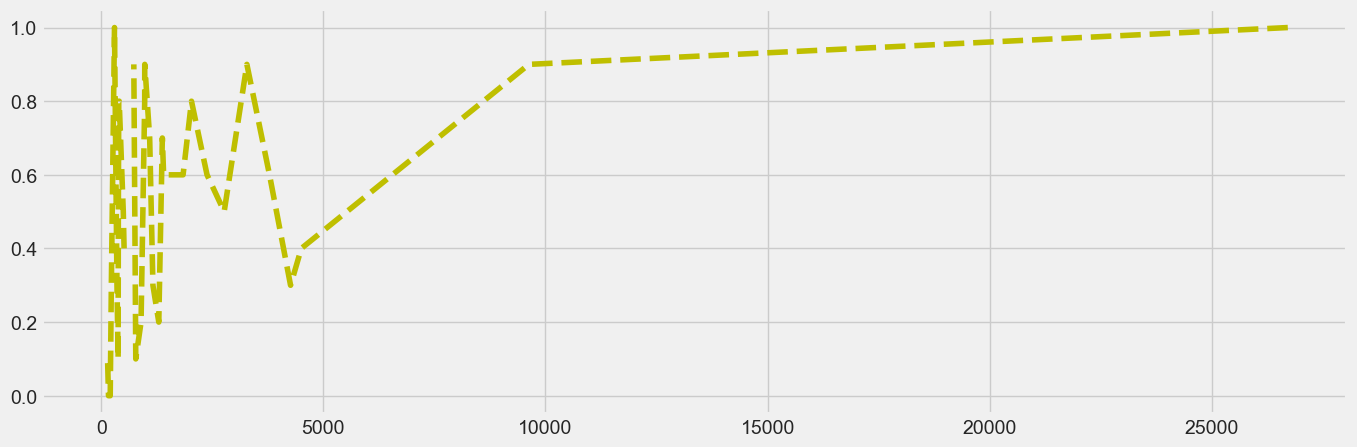

In [110]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(df_covid_external_df['Confirmed cases'],df_covid_external_df['Population Density'],'y--')
plt.savefig('dense')

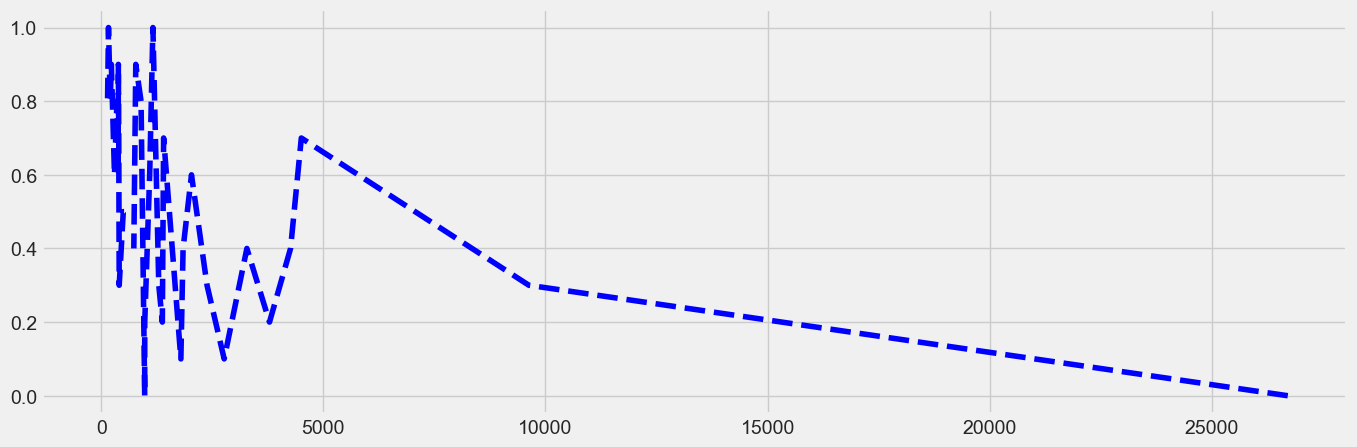

In [111]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(df_covid_external_df['Confirmed cases'],df_covid_external_df['Overall CCVI Index'],'b--')
plt.savefig('Less Dense Area')

Comment: 
* Less dense area has the highest confirmed cases.

In [112]:
#sns.barplot(x ='Revised_budget (Bn)', y = 'Initial_budget (Bn)', data = budget_df )

Text(0.5, 1.0, 'First Quarter GDP versus Year')

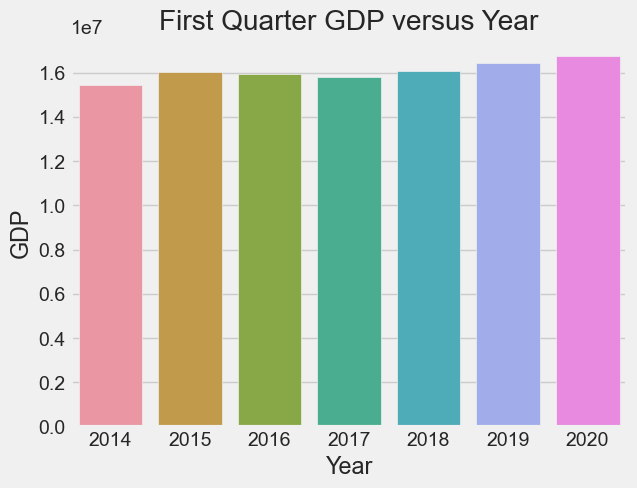

In [113]:
sns.barplot(x = 'Year', y = 'GDP', data=quarter1)
plt.title('First Quarter GDP versus Year')

From the above graph, it can be concluded that year 2020 recorded the highest GDP more than 16 million while year 2014 recorded the least GDP  with less than 16 million.

Text(0.5, 1.0, 'Second Quarter GDP versus Year')

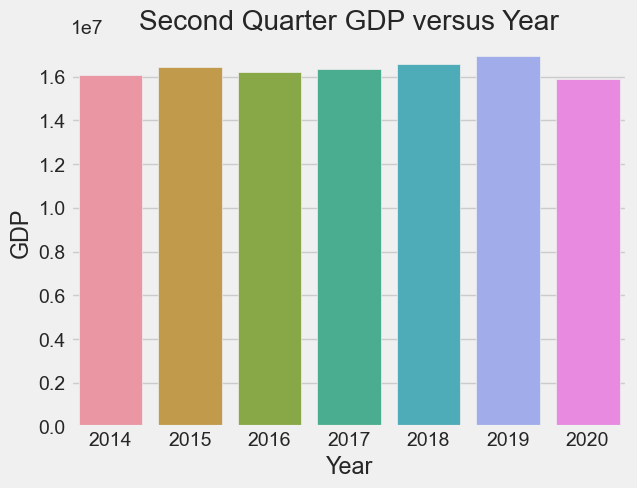

In [114]:
sns.barplot(x = 'Year', y = 'GDP', data=quarter2)
plt.title('Second Quarter GDP versus Year')

Text(0.5, 1.0, 'Third Quarter GDP versus Year')

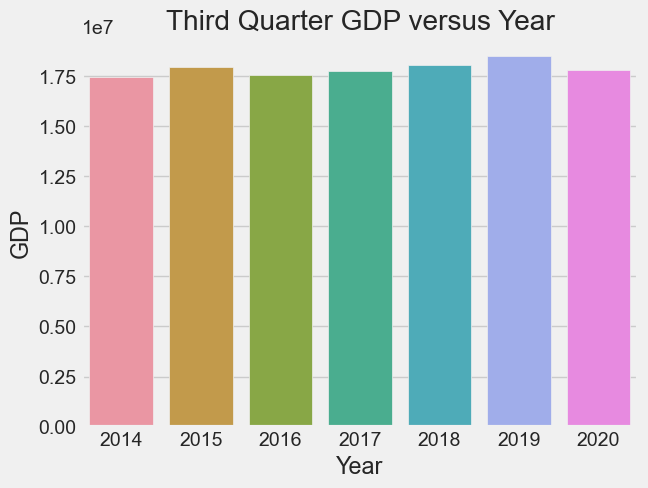

In [115]:
sns.barplot(x = 'Year', y = 'GDP', data=quarter3)
plt.title('Third Quarter GDP versus Year')

In the third quarter of the year, year 2019 recorded the highest GDP close to 20 million while year 2014 and 2016 recorded the least GDP of 17.5 million

Text(0.5, 1.0, 'Last Quarter GDP versus Year')

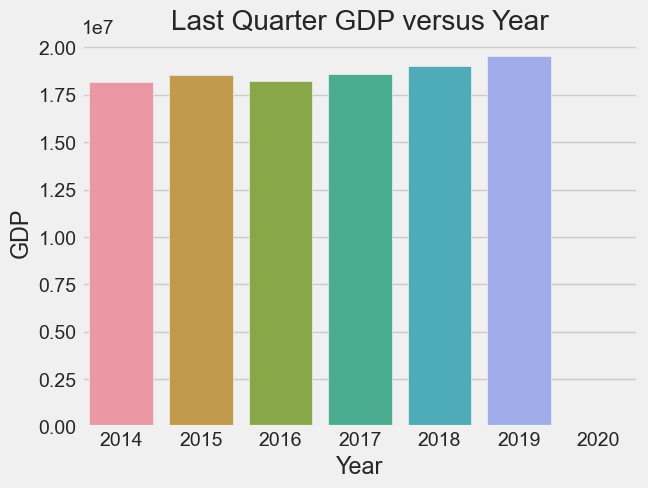

In [116]:
sns.barplot(x = 'Year', y = 'GDP', data=last_quarter)
plt.title('Last Quarter GDP versus Year')

Comment:
* No GDP recorded in the 2020,2019 was the year recorded the highest GDP approximately 20million while 2014 and 2016 recorded the least GDP.

Text(0.5, 1.0, 'GDP Versus Year')

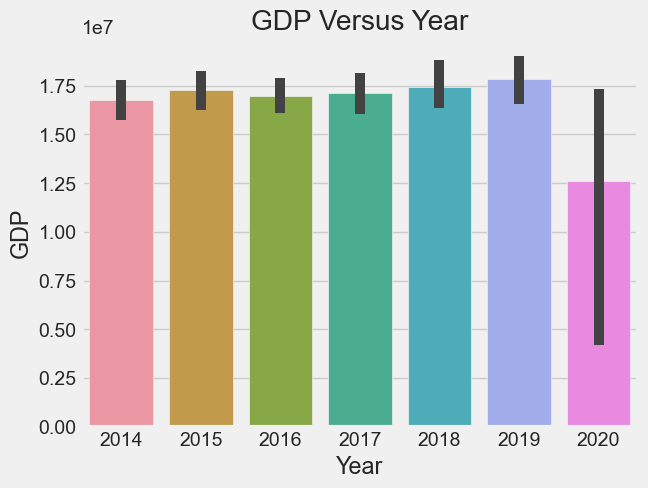

In [117]:
sns.barplot(x = 'Year', y = 'GDP', data = gdp_df)
plt.title('GDP Versus Year')

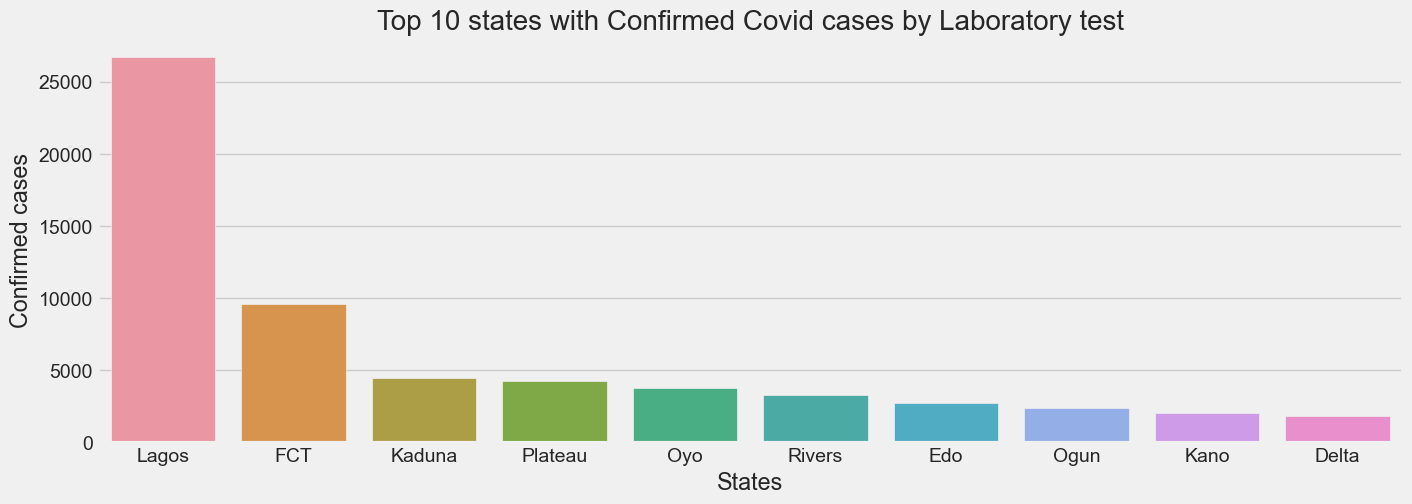

In [118]:
df = df.sort_values(by=['Confirmed cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Confirmed cases', data = df).set_title("Top 10 states with Confirmed Covid cases by Laboratory test", fontdict = { 'fontsize': 20});

From the above result, 
Lagos State recorded highest number of confirmed cases with over 25000 while Kano, Delta and Ogun recorded least with less than 3000 patients.

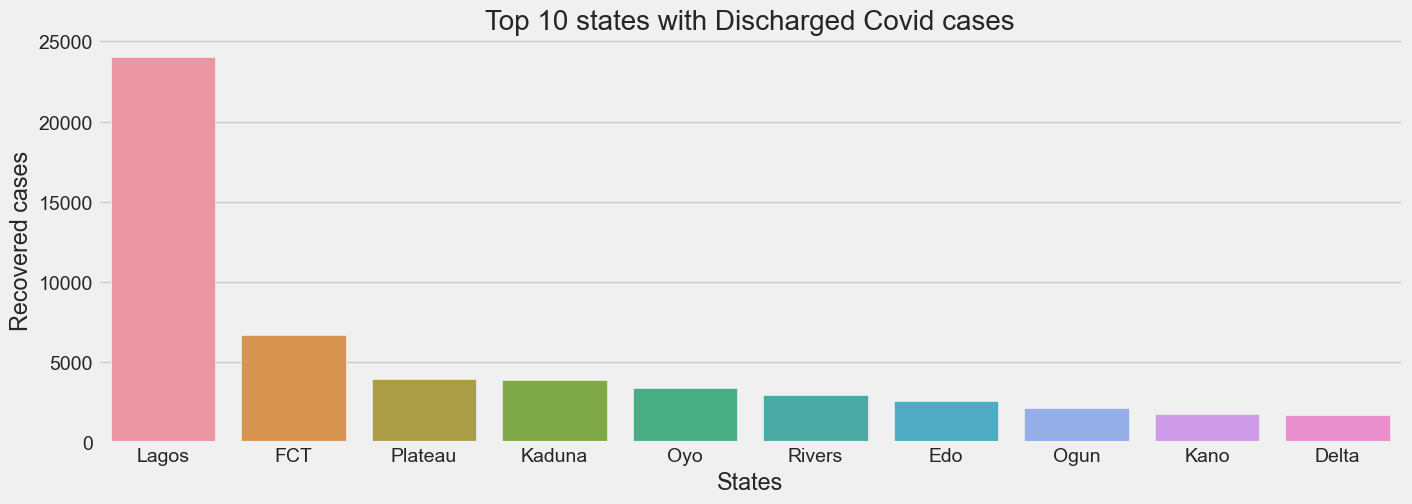

In [119]:
df = df.sort_values(by=['Recovered cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Discharged Covid cases", fontdict = { 'fontsize': 20});


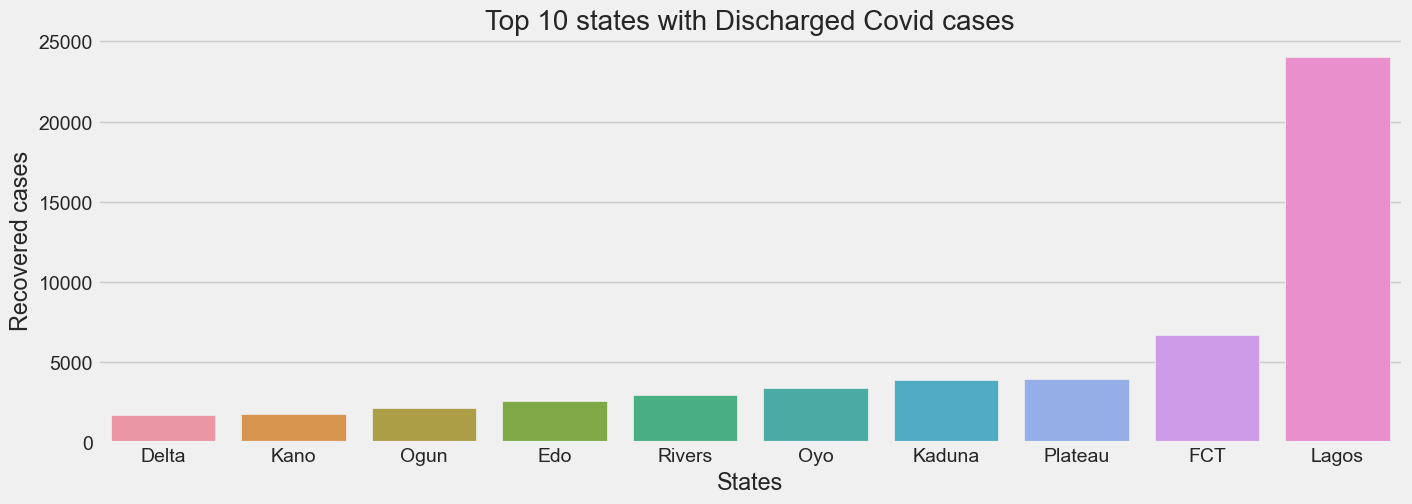

In [120]:
df = df.sort_values(by=['Recovered cases']).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Recovered cases', data = df).set_title("Top 10 states with Discharged Covid cases", fontdict = { 'fontsize': 20});


From the above result, 
* Lagos State recorded highest number of discharged patients with over 20000 while Delta recorded leastLagos State recorded highest number of discharged patients with over 20000 while Delta, Kano and Ogun recorded the least with less than 3000 patients.

Text(0.5, 1.0, 'Top 10 states with Death Covid cases')

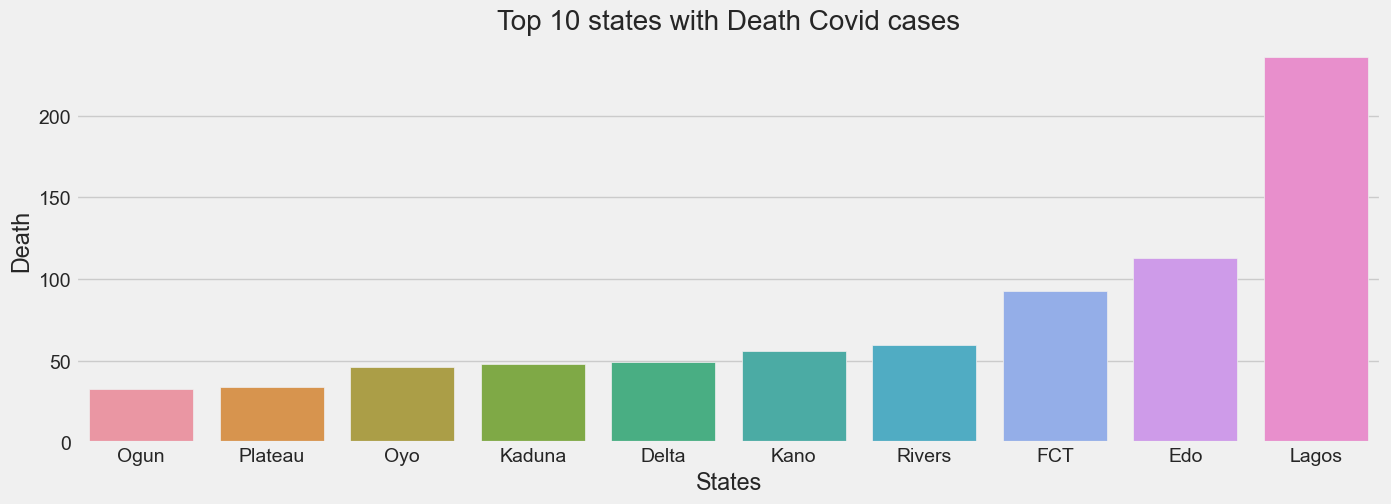

In [121]:
df = df.sort_values(by=['Death']).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Death', data = df).set_title("Top 10 states with Death Covid cases", fontdict = { 'fontsize': 20})

* Lagos has the highest number of death patient with over 200 while the Delta and Kano had the least death patients with less than 50 death record.
* Edo is the second highest number of death rate follow by FCT between 100 to 150.

### Line plot for the total confirmed, recovered and death cases daily in Nigeria

Text(0.5, 1.0, 'Scatter Plot of Admitted Cases and Confirmed Cases.')

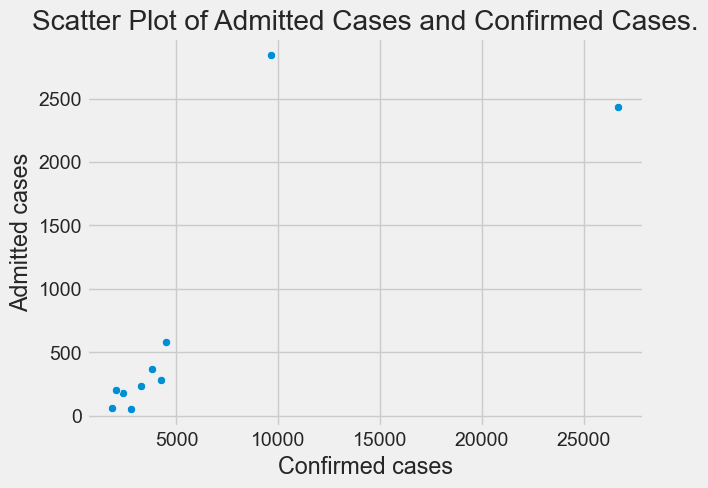

In [122]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'Confirmed cases', y = 'Admitted cases', data = df)
plt.title('Scatter Plot of Admitted Cases and Confirmed Cases.')

* Number of Admitted cases raise to over 2500 while Number of Confirmed Cases raise to over 25,000

Text(0.5, 1.0, 'Scatter Plot of Death Cases and Confirmed Cases.')

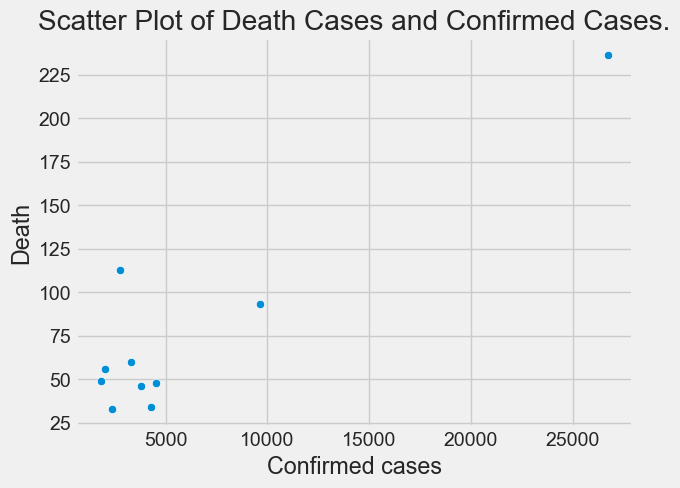

In [123]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'Confirmed cases', y = 'Death', data = df)
plt.title('Scatter Plot of Death Cases and Confirmed Cases.')

The number of Admitted cases raise to over 225 while Number of Confirmed Cases raise to over 25,000

Text(0.5, 1.0, 'Scatter Plot of Death Cases and the Corresponding States.')

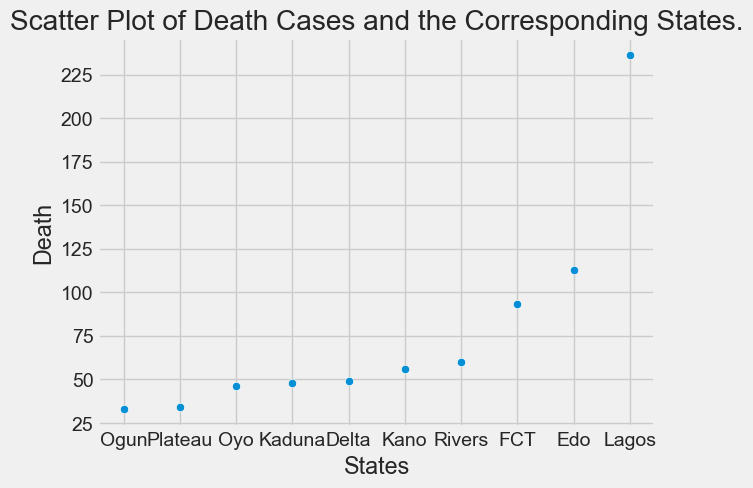

In [124]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'States', y = 'Death', data = df)
plt.title('Scatter Plot of Death Cases and the Corresponding States.')

From the graph above result, it is shown that Lagos highest number of death record of more 225 follow by Edo with more than 100 but less than 125 while both Plateau and Ogun recorded less record of death below 50

Text(0.5, 1.0, 'Scatter Plot of Admitted Cases and the Corresponding States.')

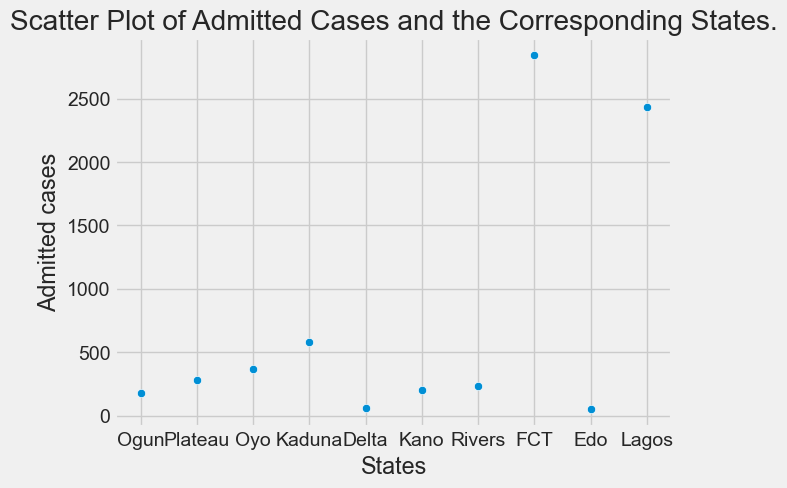

In [125]:
#Plot scatter plot between mean area and mean smoothness
sns.scatterplot(x = 'States', y = 'Admitted cases', data = df)
plt.title('Scatter Plot of Admitted Cases and the Corresponding States.')

The Scatter graph above shows that FCT recorded the highest number of admission case of more than 2500 patients while Edo and Delta had below 250 patients recorded

### Correlation between the columns

In [126]:
df.corr()

,Confirmed cases,Admitted cases,Recovered cases,Death
Confirmed cases,1.000000,0.790451,0.995709,0.914463
Admitted cases,0.790451,1.000000,0.730416,0.667474
Recovered cases,0.995709,0.730416,1.000000,0.917478
Death,0.914463,0.667474,0.917478,1.000000


Text(0.5, 1.0, 'Correlation between Confirmed, Admitted, Recovered and Death Cases')

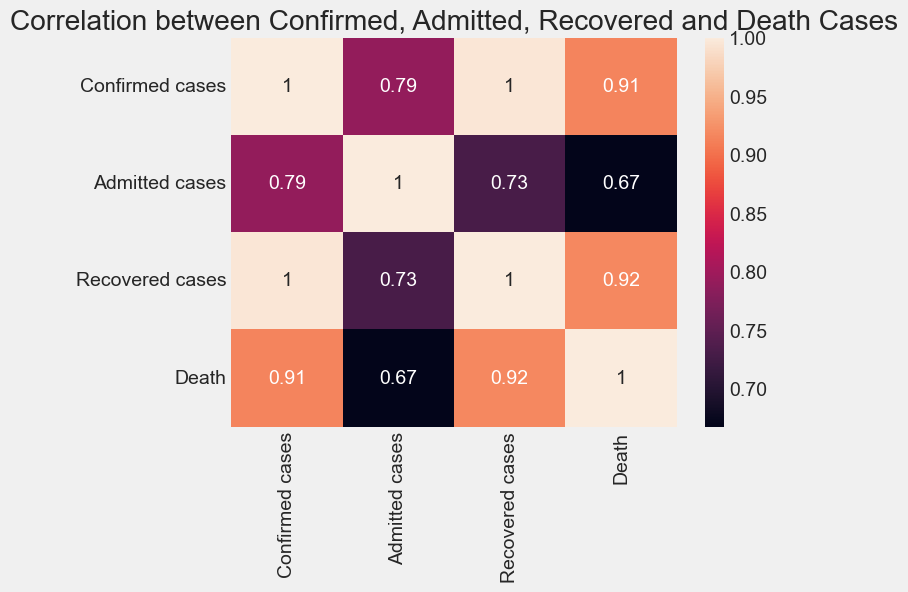

In [127]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between Confirmed, Admitted, Recovered and Death Cases')

There is a high correlation coefficient between:
   * Death and Confirmed cases, correlation coefficient is 0.91
   * Recovered cases and Confirmed cases, correlation coefficient is 1 
   * Recovered cases and Death cases, correlation coefficient is 0.92
   * Admitted cases and Confirmed cases, correlation coefficient is 0.79
   * Confirmed cases to Confirmed cases, correlation coefficient is 1
   * Death cases to Death cases, correlation coefficient is 1
   * Recovered cases to Recovered cases, correlation coefficient is 1 
   * Admitted cases and Admitted cases, correlation coefficient is 1

   * Low correlation coefficient between Admitted cases and Death cases, correlation coefficient is 0.67

In [128]:
#plt.figure(figsize=(6, 6))
#sns.heatmap(df.corr(), annot=True)

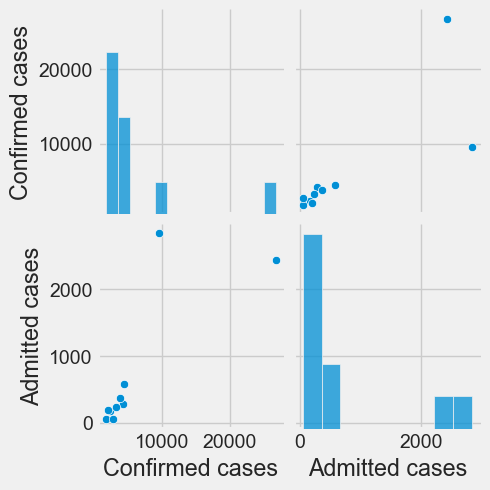

In [129]:
# Plot the pairplot
sns.pairplot(df, vars=['Confirmed cases', 'Admitted cases'])

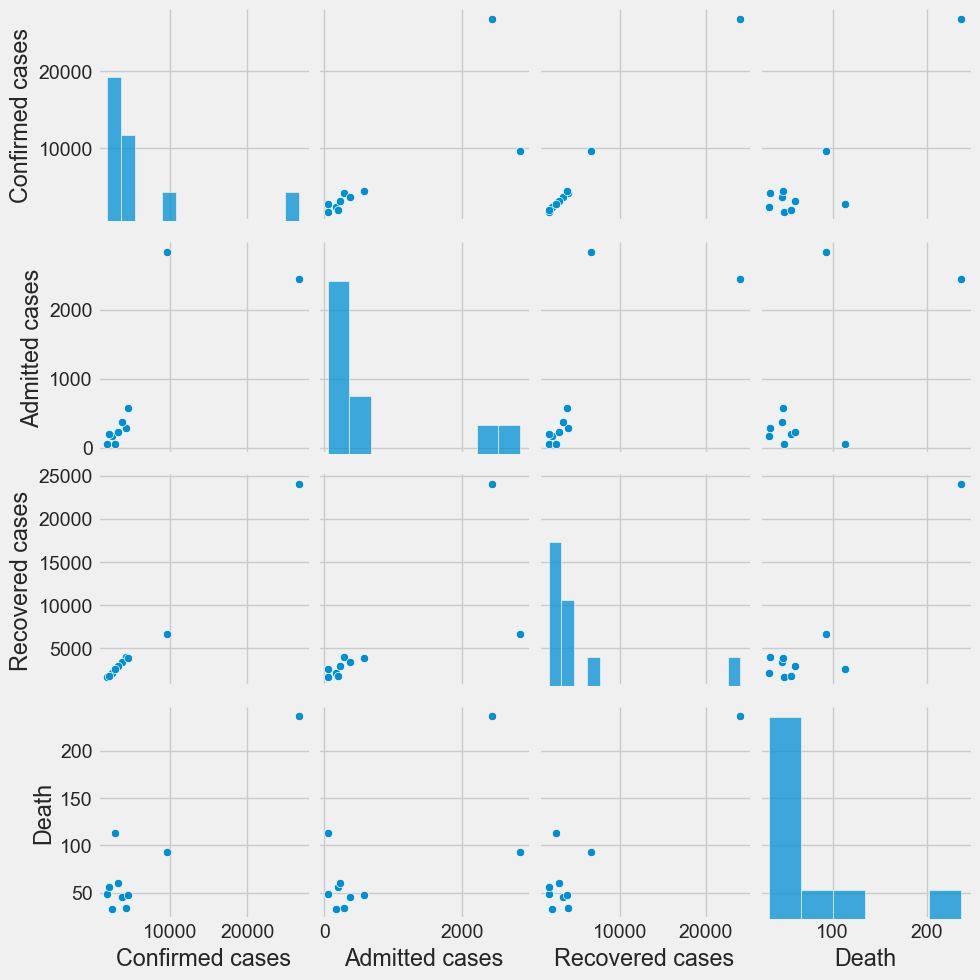

In [130]:
# Plot the pairplot
sns.pairplot(df, vars=['Confirmed cases', 'Admitted cases', 'Recovered cases', 'Death'])

Text(0.5, 1.0, 'Distribution Density for Death Rate')

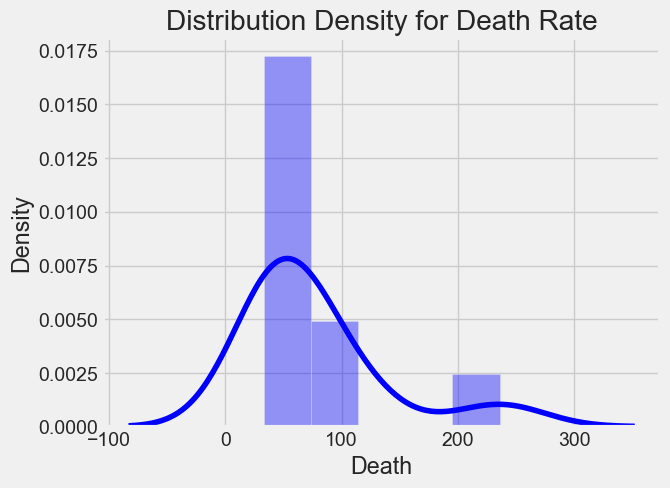

In [131]:
#Distribution plot
sns.distplot(df['Death'],bins = 5, color = 'blue')
plt.title('Distribution Density for Death Rate')

Death Rate recorded mostly between 0 to 100

Text(0.5, 1.0, 'Distribution Density for Death Rate')

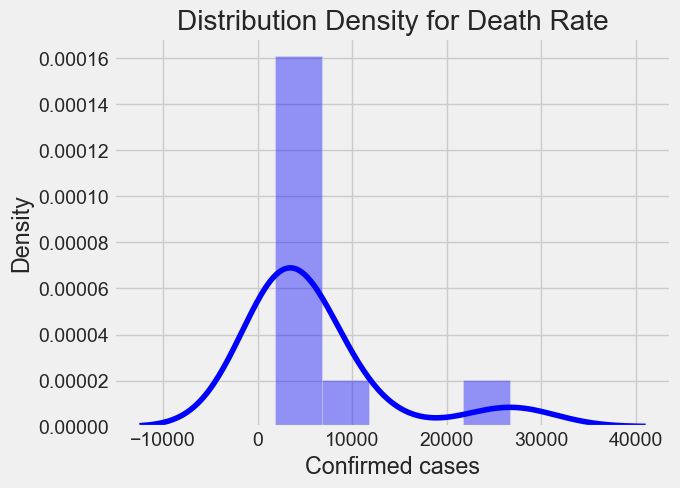

In [132]:
#Distribution plot
sns.distplot(df['Confirmed cases'],bins = 5, color = 'blue')
plt.title('Distribution Density for Death Rate')

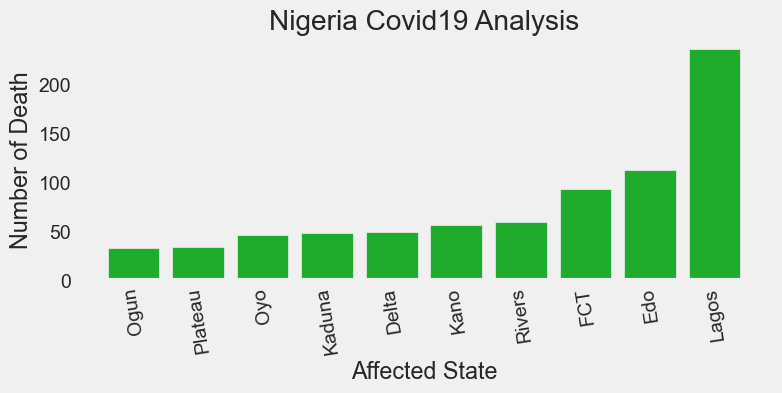

In [133]:
# Create a Figure
fig = plt.figure(figsize=(8, 3))

# Create a bar plot of name vs grade
plt.bar(x=df['States'], height=df['Death'], color='#1fab2c')

# Customize the chart
plt.title('Nigeria Covid19 Analysis')
plt.xlabel('Affected State')
plt.ylabel('Number of Death')
plt.grid()
#plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=99)
plt.show()

Comments:
* From the bar chart above, it is shown that:
    * Lagos State has the highest death rate while Ogun and Plateau States recorded the least death rate in Nigeria.

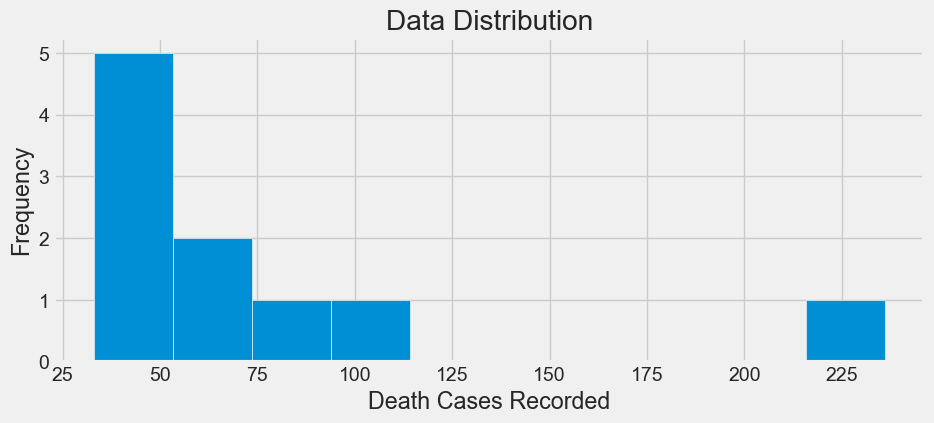

In [134]:
# Get the variable to examine
var_data = df['Death']

# Create a Figure
fig = plt.figure(figsize=(10, 4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Death Cases Recorded')
plt.ylabel('Frequency')

#Show the figure
fig.show()

Minimum:33.00
Mean:76.80
Median:52.50
Mode:33.00
Maximum:236.00



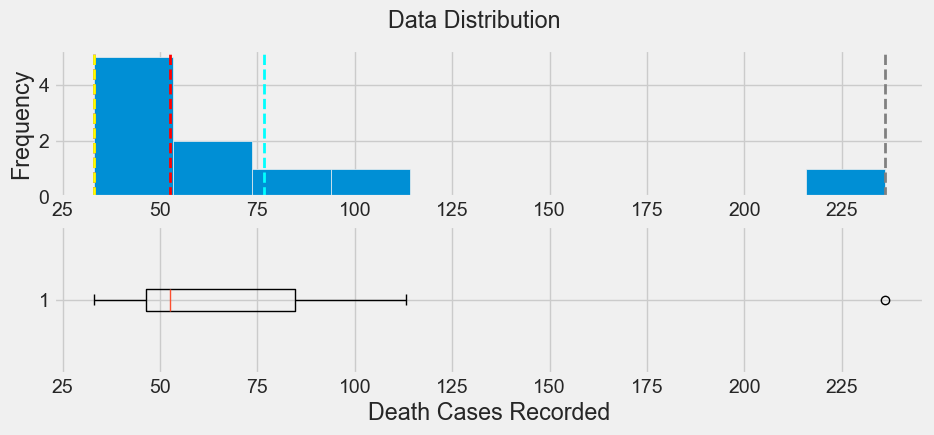

In [135]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))
    
    # Plot the histogram 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'purple', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot 
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Death Cases Recorded')
    
    # Add a title to the Figure
    fig.suptitle('Data Distribution')
    
    # Show the figure
    fig.show()

show_distribution(df['Death'])

Comments:
* The yellow dash vertical line signifies mode(most occurrence) rate of death
* The dashed vertical red line signifies median(middle) rate of death
* The dashed vertical cyan line signifies mean rate of death
* The dashed vertical red line signifies median(middle) rate of death
* The dashed vertical purple line signifies least rate of death
* The dashed vertical gray line signifies highest rate of death

### Pie Charts

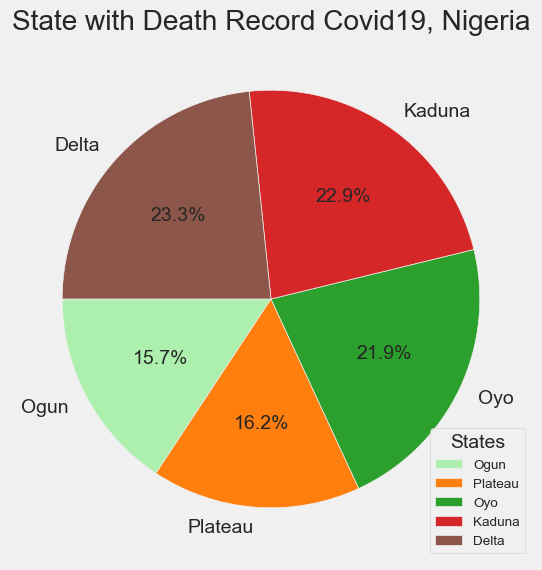

In [136]:
death = df["Death"].head()
state = df["States"].head()
colors = ["#adefad", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
#explode = (0.1, 0, 0, 0, 0)  
plt.figure(figsize = (6,8))
plt.pie(death, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Death Record Covid19, Nigeria")
plt.show()

Comment:
* Delta recorded the highest death of 23.3% follow by Kaduna with 22.9% while Kano has the least recorded of 15.7%
* Therefore it is unsafe to live in Delta. 

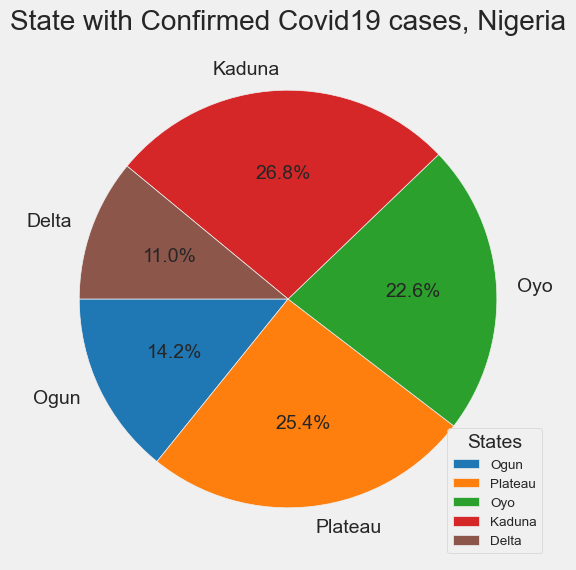

In [137]:
confirm = df["Confirmed cases"].head()
state = df["States"].head()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
#explode = (0.1, 0, 0, 0, 0)  

plt.figure(figsize = (6,8))
plt.pie(confirm, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Confirmed Covid19 cases, Nigeria")
plt.show()

Comment:Base on the states selected, using pie chart above,

- Kaduna has the highest confirmed case record of 26.8% follow by Plateau with 25.4% while Delta has the least confirmed case recorded with 11.0%
- Covid19 virus tends to spread more in Kaduna than any other selected states in Nigeria.   

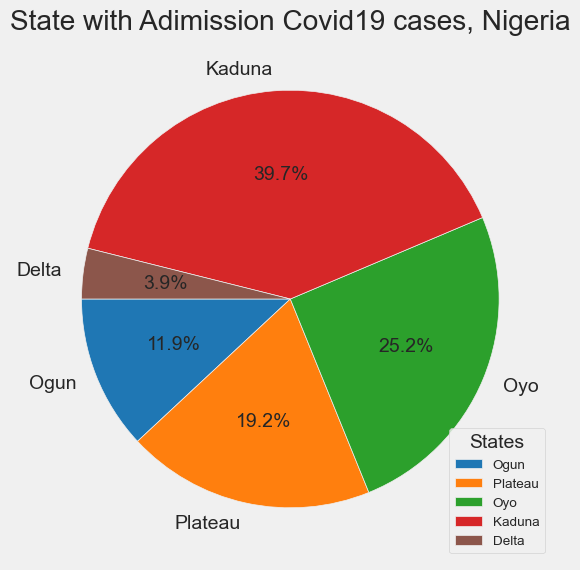

In [138]:
admitted = df["Admitted cases"].head()
state = df["States"].head()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
#explode = (0.1, 0, 0, 0, 0)  
plt.figure(figsize = (6,8))
plt.pie(admitted, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Adimission Covid19 cases, Nigeria")
plt.show()

Comment:
* Kaduna has the highest number of admitted case recorded of 39.7% follow by Oyo with 25.2% while Delta has the minimum number of admitted case record of 3.9%    

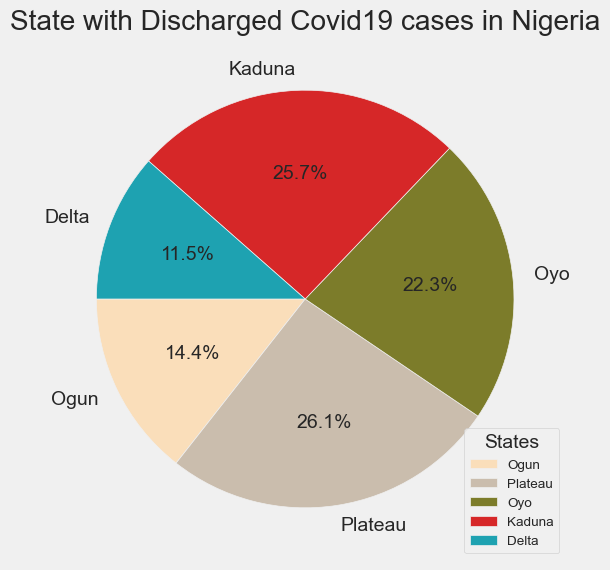

In [139]:
recover = df["Recovered cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"]
#explode = (0.1, 0, 0, 0, 0)  
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=colors, autopct='%1.1f%%', startangle=180)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Discharged Covid19 cases in Nigeria")
plt.show()

Comment:
* Plateau is the state with the highest record of discharged with 26.1% follow by Kaduna with 25.7% while Delta has the least record of discharged record

### Donut Plots

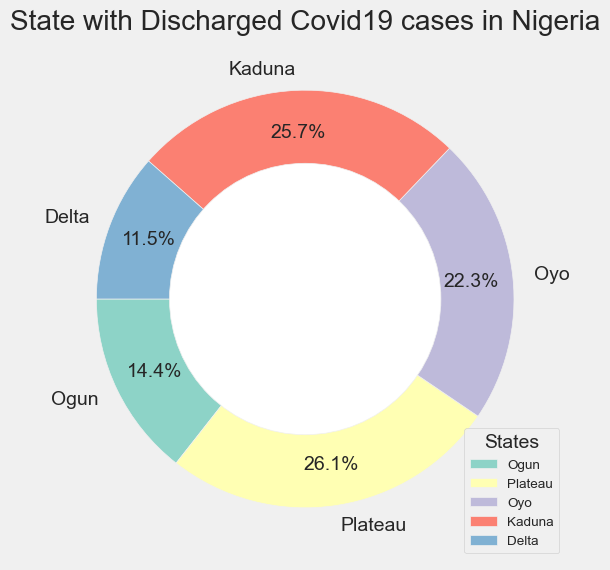

In [140]:
recover = df["Recovered cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Discharged Covid19 cases in Nigeria")
plt.show()

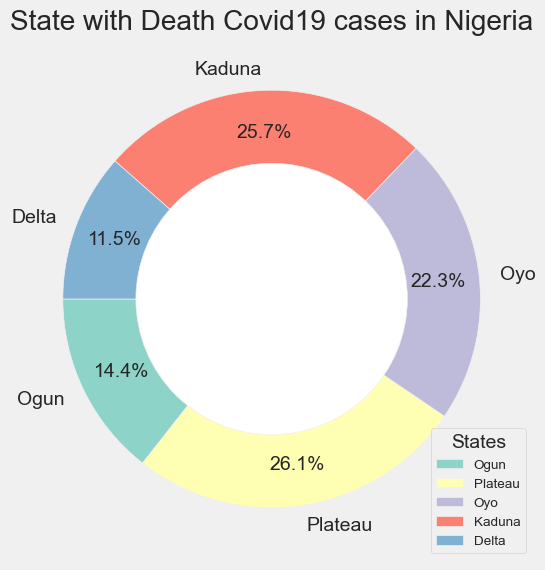

In [141]:
death = df["Death"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Death Covid19 cases in Nigeria")
plt.show()

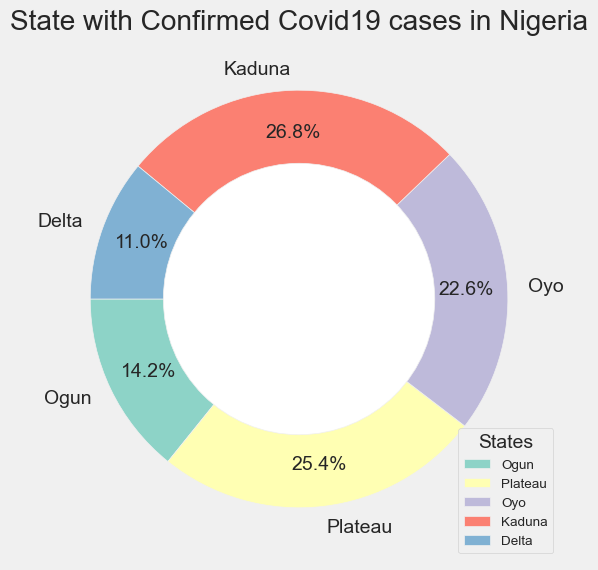

In [142]:
recover = df["Confirmed cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Confirmed Covid19 cases in Nigeria")
plt.show()

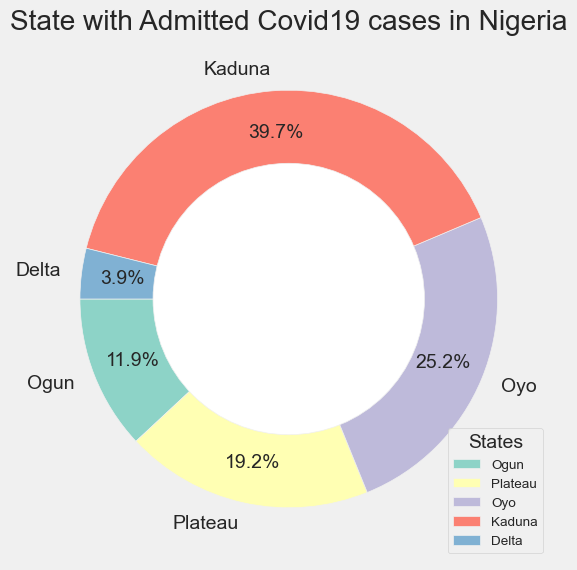

In [143]:
recover = df["Admitted cases"].head()
state = df["States"].head()
colors = ["#fadeba", "#cabdad", "#7c7c2a", "#d62728", "#1ea2b1"] 
plt.figure(figsize = (6,8))
plt.pie(recover, labels=state, colors=sns.color_palette('Set3'),  pctdistance=0.80, autopct='%1.1f%%', startangle=180)
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(title = 'States', loc = 4, fontsize = 'x-small')
plt.title("State with Admitted Covid19 cases in Nigeria")
plt.show()

<AxesSubplot:xlabel='Admitted cases', ylabel='Count'>

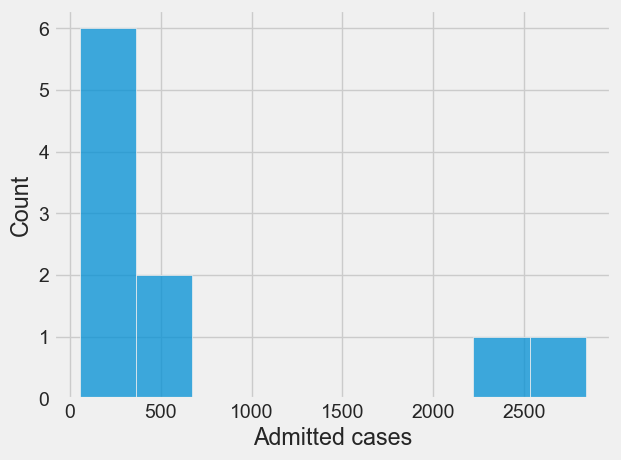

In [144]:
#Histogram to show the admitted cases
sns.histplot(data=df, x = 'Admitted cases')

Below 500 Patients were admitted and affected by covid-19 virus mostly 

In [145]:
df = df['Admitted cases'] == 1500
df.sum()

0

## Summary

I learnt how to perform Exploratory Data Analysis (EDA) 
in Python and how to use external Python libraries like Pandas, Numpy, Matplotlib, Seaborn etc.
to conduct univariate analysis, bivariate analysis and data visualization.

# Conclusion
It is no longer a news that COVID-19 pandemic has left no part of the world untouched. The virus emerged from Wuhan, China, and spread to all other country for example Nigeria. Base on the analysis carried out so far, COVID-19 pandemic has an enormous effect on Nigeria health, education, transportation, finance, telecommunication just to mention few. It is high time for leadership, citizens and state institutions to come together for solutions to prevent the deadly virus from spreading.

The following were applied and achieved successfully during the course of the Nigeria covid-19 data analysis project:
* Data collection process from data sources.
* Data cleaning and manipulation of data.
* Develop visualization skills through the use of open-source libraries in Python.
* Generate insights from analysis



## Reference
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covidnig.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
* https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/Budget%20data.csv
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/RealGDP.csv
* https://github.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/blob/main/covid_external.csv
* https://www.w3schools.com/python/
* https://www.kaggle.com/learn/pandas
* https://pythoninstitute.org
* https://www.coursera.org/learn/python-for-applied-data-science-ai
* Python how to progeam by deitel deitel